In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def multipleIndex(data, start_year, end_year, cap, buffer, duration, participationRate = 1):

    startyear = start_year
    # Set index and convert date column to datetime
    for i in range(len(data)):
        data[i].set_index('Date', inplace=True)
        data[i].reset_index(inplace=True)
        data[i].rename(columns={'index': 'Date'}, inplace=True)
        data[i]['Date'] = pd.to_datetime(data[i]['Date'])

    CAGR = []
    Outcome = []
    CAGR2 = []

    while start_year + duration <= end_year:
        inclist = []
        for i in range(len(data)):
            CurYearData = data[i][data[i]['Date'].dt.year == start_year]
            CurYearData.reset_index(inplace=True)
            CurYearData = CurYearData['Adj Close']
            NextYearData = data[i][data[i]['Date'].dt.year == start_year + duration]
            NextYearData.reset_index(inplace=True)
            NextYearData = NextYearData['Adj Close']
            totalInc = 0
            for i in range(0, len(CurYearData) - 1):
                inc = NextYearData[i] / CurYearData[i] - 1
                if inc <= 0 and inc > 0 - buffer: 
                    inc = 0
                elif inc <= 0 - buffer:
                    inc = inc + buffer
                elif inc > 0:
                    inc = inc * participationRate
                    if inc > cap:
                        inc = cap
                totalInc += inc
            totalInc /= len(NextYearData)
            inclist.append(totalInc)
            
        totalInc = np.min(inclist)
        Outcome.append(totalInc * 100)
        start_year += 1

    start_year = startyear  # Reset start_year to its initial value
    yearList = []
    while start_year + duration <= end_year:
        endYear = start_year + duration
        yearList.append(f"{start_year}-{endYear}")
        inclist = []
        for i in range(len(data)):
            CurYearData = data[i][data[i]['Date'].dt.year == start_year]
            CurYearData.reset_index(inplace=True)
            CurYearData = CurYearData['Adj Close']
            NextYearData = data[i][data[i]['Date'].dt.year == start_year + duration]
            NextYearData.reset_index(inplace=True)
            NextYearData = NextYearData['Adj Close']
            totalInc = 0
            for i in range(0, len(CurYearData) - 1):
                inc = ((NextYearData[i] / CurYearData[i]) - 1) * 100
                totalInc += inc
            totalInc /= len(NextYearData)
            inclist.append(totalInc)
        totalInc = np.max(inclist)
        totalInc2 = np.min(inclist)
        CAGR.append(totalInc)
        CAGR2.append(totalInc2)
        start_year += 1

    # Plot results
    plt.figure(figsize=(14, 7))

    # Add labels for CAGR
    avg_CAGR = np.mean(CAGR)
    avg_CAGR2 = np.mean(CAGR2)
    avg_RILAout = np.mean(Outcome)
    ymax = max(np.max(CAGR), np.max(Outcome))
    ymin = min(np.min(CAGR), np.min(Outcome))
    comp = (ymax - ymin) / 20

    for i, txt in enumerate(CAGR):
        curdif = CAGR[i] - Outcome[i]
        if curdif > 0 and curdif < comp:
            plt.text(yearList[i], CAGR[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)
        elif curdif < 0 and curdif > - comp:
            plt.text(yearList[i], CAGR[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)
        else:
            plt.text(yearList[i], CAGR[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)
    for i, txt in enumerate(Outcome):
        curdif = CAGR[i] - Outcome[i]
        if curdif > 0 and curdif < comp:
            plt.text(yearList[i], CAGR[i] - comp, f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)
        elif curdif < 0 and curdif > - comp:
            plt.text(yearList[i], CAGR[i] + comp, f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)
        else:
            plt.text(yearList[i], Outcome[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)

    for i, txt in enumerate(CAGR2):
        curdif = CAGR2[i] - Outcome[i]
        if curdif > 0 and curdif < comp:
            plt.text(yearList[i], CAGR2[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)
        elif curdif < 0 and curdif > - comp:
            plt.text(yearList[i], CAGR2[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)
        else:
            plt.text(yearList[i], CAGR2[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)

    # Add labels for RILA
    # for i, txt in enumerate(RILA):
    #     curdif = RILA[i] - comp[i]
    #     plt.text(yearList[i], RILA[i], f'{txt:.2f}%', ha='center', va='bottom', fontsize=8)

    if cap >= 50:
        plt.text(yearList[-1], ymax - 5 * comp, f'Note: Cap: Unlimited, Buffer: {buffer*100:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
    else:
        plt.text(yearList[-1], ymax - 5 * comp, f'Note: Cap: {cap*100:.2f}%, Buffer: {buffer*100:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)

    plt.title(f'Comparison of Lesser of Multiple Index Annual Return and Index Return Performance Strategy')
    plt.plot(yearList, CAGR, label=f'Strong Index Performance')
    plt.plot(yearList, CAGR2, label=f'Weak Index Performance')
    plt.plot(yearList, Outcome, label=f'Lesser Index Return Annual point to point')
    plt.text(yearList[-1], ymax - comp, f'Average Strong Index Annual Return: {avg_CAGR:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
    plt.text(yearList[-1], ymax - 9 * comp, f'Average Weak Index Annual Return: {avg_CAGR2:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
    plt.text(yearList[-1], ymax - 7 * comp, f'Participation Rate: {participationRate*100:.2f}%', color='blue', ha='right', va='bottom', fontsize=10)
    plt.text(yearList[-1], ymax - 3 * comp, f'Average Lesser Index Return: {avg_RILAout:.2f}%', color='orange', ha='right', va='top', fontsize=10)

    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
    plt.ylim(ymin, ymax)
    plt.tight_layout()  # Adjust layout to make room for x-axis labels
    plt.show()

    CAGR = [f"{value:.2f}%" for value in CAGR]
    Outcome = [f"{value:.2f}%" for value in Outcome]
    if cap >= 50:
        newData = {
            "Year List": yearList,
            f"Average Strong Index Annual Return": CAGR,
            f'Average Lesser Index Return': Outcome,
            f'Note: RILA Cap: Unlimited, Buffer: {buffer*100:.2f}%': [""] * len(Outcome)
        }
    else:
        newData = {
            "Year List": yearList,
            f"Average Strong Index Annual Return": CAGR,
            f'Average Lesser Index Return': Outcome,
            f'Note: RILA Cap: {cap*100:.2f}%, Buffer: {buffer*100:.2f}%': [""] * len(Outcome)
        }
    df = pd.DataFrame(newData)
    df.to_excel('RILAcapBuffer.xlsx', engine='openpyxl', index=False)

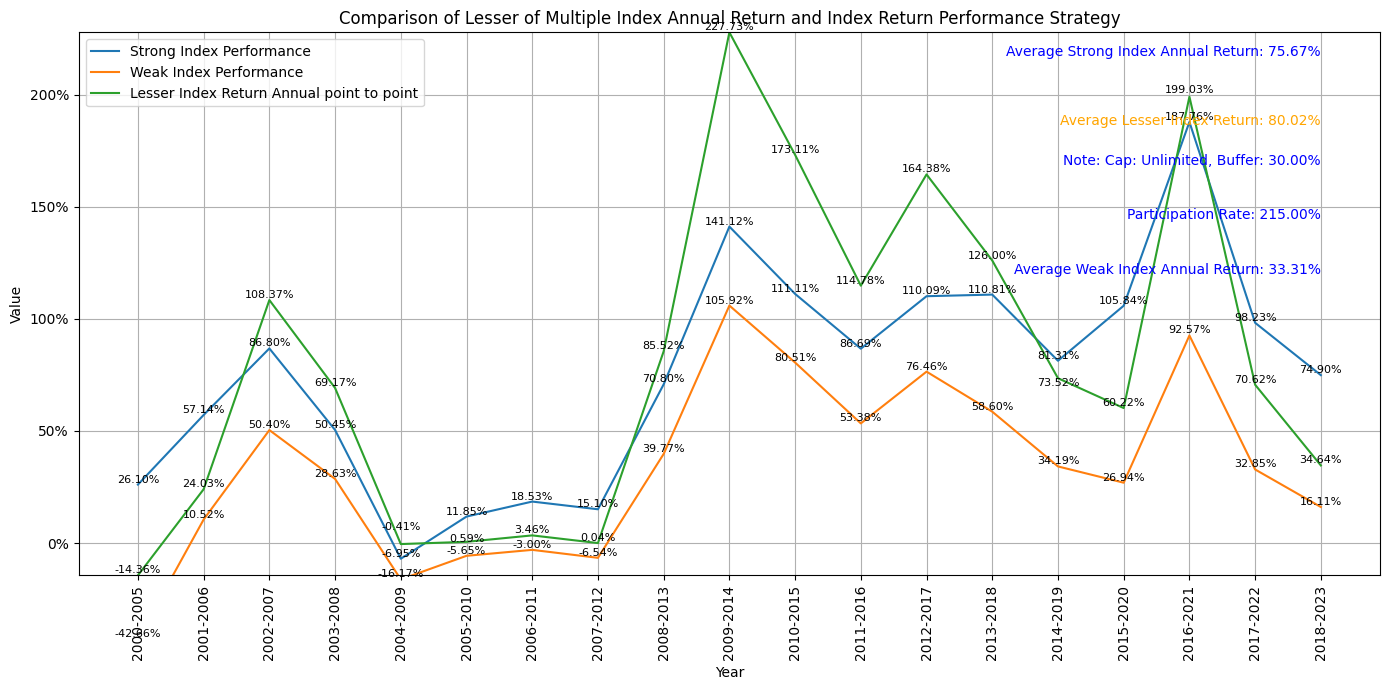

In [20]:
sp500data = pd.read_csv('sp500_data_with_weekends.csv')
russelldata = pd.read_csv('Russell 2000_data_with_weekends.csv')
nasdaqdata = pd.read_csv('Nasdaq_data_with_weekends.csv')
EAFdata = pd.read_csv('MSCI-EAFE_with_weekends.csv')
EEMdata = pd.read_csv('MSCI-Emerging_with_weekends.csv')
DSIdata = pd.read_csv('MSCI-KLD-400_with_weekends.csv')
STOXX50data = pd.read_csv('EURO-STOXX-50_with_weekends.csv')

data = []
data.append(sp500data)
data.append(russelldata)
data.append(nasdaqdata)
multipleIndex(data, 2000,2023,1000,0.3,5,2.15)
